# Ejercicio 3 - Vectorizar función en la GPU

Se pide **vectorizar para la GPU** la función **`zero_suppress`** del fichero
proporcionado

In [1]:
### EVITAR ERRORES

!uv pip install -q --system numba-cuda==0.4.0

from numba import config
config.CUDA_ENABLE_PYNVJITLINK = 1

/usr/local/lib/python3.11/dist-packages/numba_cuda/numba/cuda/dispatcher.py:605: NumbaPerformanceWarning: Grid size 98 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))


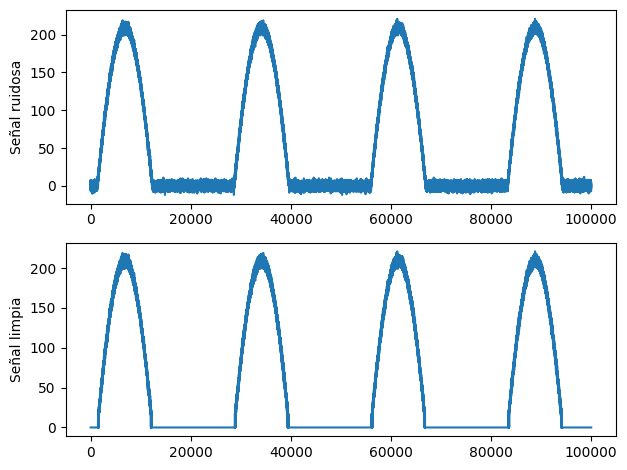

In [2]:
from matplotlib import pyplot as plt
import numpy as np
from numba import vectorize

# Vectorización para la GPU con Numba
@vectorize(['int16(int16, int16)'], target='cuda')
def zero_suppress(waveform_value, threshold):
    if waveform_value < threshold:
        return 0
    else:
        return waveform_value

n = 100000
noise = np.random.normal(size=n) * 3
pulses = np.maximum(np.sin(np.arange(n) / (n / 23)) - 0.3, 0.0)
noisy_signal = ((pulses * 300) + noise).astype(np.int16)

# El threshold debe ser un array del mismo tamaño para que funcione con vectorize
threshold_array = np.full_like(noisy_signal, 15)

clean_signal = zero_suppress(noisy_signal, threshold_array)

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
ax1.plot(noisy_signal)
ax1.set_ylabel("Señal ruidosa")
ax2.plot(clean_signal)
ax2.set_ylabel("Señal limpia")
fig.tight_layout()
plt.show()
